In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------------------- ------------------ 30.7/61.0 kB 660.6 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 525.1 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 362.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.5 MB 919.0 kB/s eta 0:00:17
   ---------------------------------------- 0.1/15.5 MB 853.3 kB/s eta 0:00:19
    --------------------------------------- 0.2/15.5 MB 958.4 kB/s eta 0:00:16
    --------------------------------------- 0.3/15.5 MB 911.0 kB/s eta 0:00:17
    --------------------------------------- 0.3/15.5 MB 999.0 kB/s eta 0:00:16
   - -------------------------------------- 0.4/15.5 MB 958.4 kB/s eta 0:00:16
   - -------------------------------------- 0.4/15.5 MB 970.6 kB/s eta 0:0

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
# Load dataset from the specified path
df = pd.read_csv(r"C:\Users\admin\Desktop\CodeTech IT Solutions\spam.csv", encoding="latin-1")

In [5]:
# Preprocessing: Keeping only essential columns and renaming them
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

In [6]:
# Convert labels to binary values (ham -> 0, spam -> 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [7]:
# Text Vectorization using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df['message'])

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)

In [9]:
# Train a Naive Bayes Model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [10]:
# Make predictions
y_pred = model.predict(X_test)

In [11]:
# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [12]:
# Print evaluation results
print(f"Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Model Accuracy: 0.9758

Confusion Matrix:
 [[965   0]
 [ 27 123]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



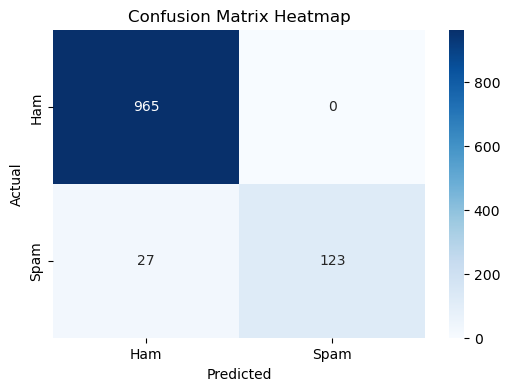

In [13]:
# Visualizing Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

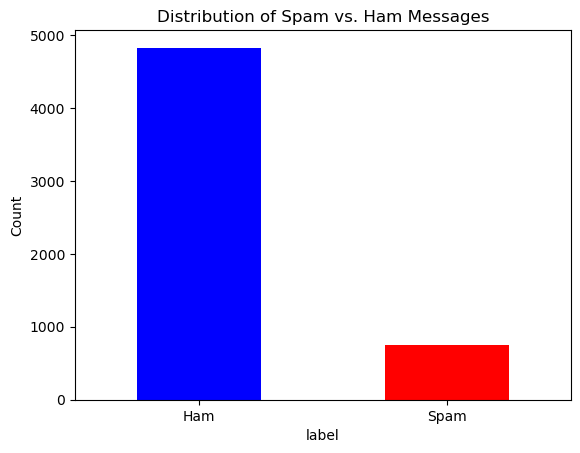

In [17]:
df['label'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.xticks(ticks=[0,1], labels=['Ham', 'Spam'], rotation=0)
plt.ylabel("Count")
plt.title("Distribution of Spam vs. Ham Messages")
plt.show()